# Classificador de dígitos completo

### Alunos:

- Caio Lucas da Silva Chacon - 20200025769
- Luiz Fernando Costa dos Santos - 20200025446

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import src.linear_models as lm
import src.classifier_all_utils as utils
import src.metrics as metrics

In [2]:
train = pd.read_csv("./data/train_redu.csv")
test = pd.read_csv("./data/test_redu.csv")

# Treinamento

In [3]:
linear_reg = lm.OneVsAll("lin")
linear_reg.fit(train)

/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tmp_label"] = train["label"].map(lambda x: 1 if x == i else -1)


In [4]:
logistic_reg = lm.OneVsAll("log", eta=0.3, bs=300, tmax=100000)
logistic_reg.fit(train)

/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:52: RuntimeWarning: overflow encountered in exp
  gt = -(1/N) * sum([xi*yi / (1+np.exp(yi*w.dot(xi))) for xi, yi in zip(batchX, batchY)])
/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tmp_label"] = train["label"].map(lambda x: 1 if x == i else -1)
/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:52: RuntimeWarning: overflow encountered in exp
  gt = -(1/N) * sum([xi*yi / (1+np.exp(yi*w.dot(xi))) for xi, yi in zip(batchX, batchY)])
/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:52: RuntimeWarning: overflow encounter

In [43]:
pocket_pla = lm.OneVsAll("pla", tmax=1500000)
pocket_pla.fit(train)

/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tmp_label"] = train["label"].map(lambda x: 1 if x == i else -1)


# Predição

In [44]:
X_test = test[["intensidade", "simetria"]].values
X_test = np.c_[np.ones(X_test.shape[0]), X_test]          
y_test = test["label"].values

In [45]:
y_pred_linr = [linear_reg.predict_one(i) for i in X_test]
y_pred_logr = [logistic_reg.predict_one(i) for i in X_test]
y_pred_pla = [pocket_pla.predict_one(i) for i in X_test]

# Avaliação

### Linear Reg

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred_linr)

array([[207,   0,   0,  11],
       [  0, 292,   0,   0],
       [  0,   0, 306,   8],
       [  0,   0,  24, 267]])

In [47]:
accuracy_score(y_test, y_pred_linr)

0.9614349775784753

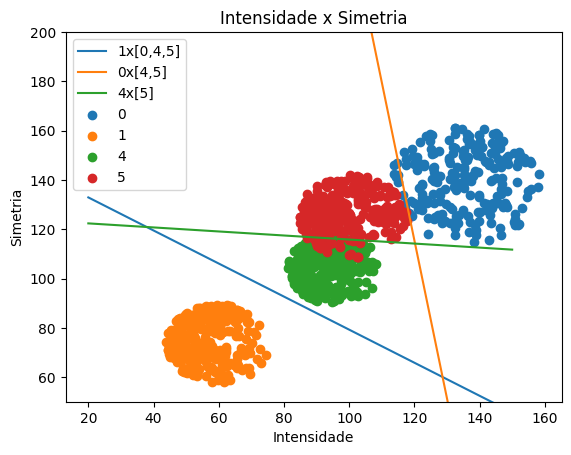

In [48]:
wei = linear_reg.get_w()

for k,w in zip(["1x[0,4,5]", "0x[4,5]", "4x[5]"], wei):
    x1 = np.array([20, 150]) # Valores arbitrários de x1 para desenhar a linha
    x2 = -(w[0] + w[1]*x1) / w[2]
    plt.plot(x1, x2, label=f"{k}")

for i in [0, 1, 4, 5]:
    plt.scatter(test.loc[test["label"] == i]['intensidade'], test.loc[test["label"] == i]['simetria'], label=f"{i}")
# plt.scatter(filter_5['intensidade'], filter_5['simetria'], color="red", label="Cinco")
plt.ylabel("Simetria")
plt.xlabel("Intensidade")
plt.title("Intensidade x Simetria")
plt.ylim(50, 200)
plt.legend()
plt.show()

### Logistic reg

### PLA

In [49]:
confusion_matrix(y_test, y_pred_pla)

array([[211,   0,   0,   7],
       [  0, 292,   0,   0],
       [  0,   0, 283,  31],
       [  3,   0,  28, 260]])

In [50]:
accuracy_score(y_test, y_pred_pla)

0.9381165919282511

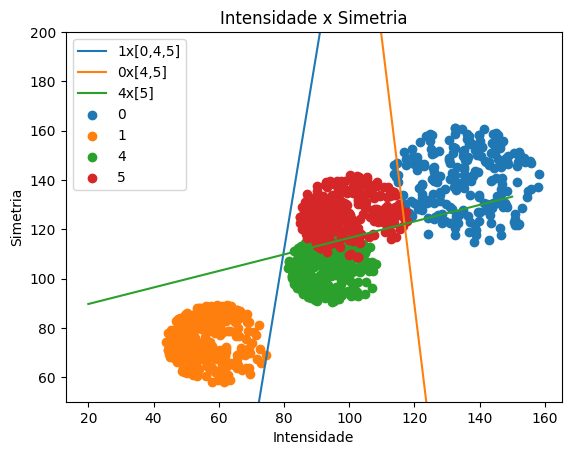

In [51]:
wei = pocket_pla.get_w()

for k,w in zip(["1x[0,4,5]", "0x[4,5]", "4x[5]"], wei):
    x1 = np.array([20, 150]) # Valores arbitrários de x1 para desenhar a linha
    x2 = -(w[0] + w[1]*x1) / w[2]
    plt.plot(x1, x2, label=f"{k}")

for i in [0, 1, 4, 5]:
    plt.scatter(test.loc[test["label"] == i]['intensidade'], test.loc[test["label"] == i]['simetria'], label=f"{i}")
# plt.scatter(filter_5['intensidade'], filter_5['simetria'], color="red", label="Cinco")
plt.ylabel("Simetria")
plt.xlabel("Intensidade")
plt.title("Intensidade x Simetria")
plt.ylim(50, 200)
plt.legend()
plt.show()

In [ ]:
# def cm(y_true, y_pred):    
#     # obter as classes únicas
#     classes = np.unique(y_true)

#     # criar uma matriz de zeros com dimensões NxN
#     n_classes = len(classes)
#     confusion_matrix = np.zeros((n_classes, n_classes))

#     # preencher a matriz de confusão com as contagens
#     for i in range(len(y_true)):
#         true_class = y_true[i]
#         pred_class = y_pred[i]
#         true_index = np.where(classes == true_class)[0][0]
#         pred_index = np.where(classes == pred_class)[0][0]
#         confusion_matrix[true_index][pred_index] += 1

#     # imprimir a matriz de confusão
#     return confusion_matrix

In [ ]:
# y_pred_linr_copy = y_pred_linr.copy()
# y_pred_logr_copy = y_pred_logr.copy()
# y_pred_pla_copy = y_pred_pla.copy()
# models_to_print = ["Regressão Linear",
#                    "Regressão Logística",
#                    "Pocket PLA"]


# for i in [0, 1, 4]:
#     print("-"*70)
#     if i != 4:
#         print(f"{i} x {[0, 1, 4, 5][i+1:]}")
#     else:
#         print(f"{i} x [5]")
#     print("-"*70)
#     for c, y_pred in enumerate([y_pred_linr_copy, y_pred_logr_copy, y_pred_pla_copy]):
#         print(models_to_print[c], end="\n\n")
#         print(metrics.classification_report_all(y_test, y_pred, real_class = i))    
#         print("-"*70)
        
        
#     y_pred_linr_copy = y_pred_linr_copy[y_pred_linr_copy != i]
#     y_pred_logr_copy = y_pred_logr_copy[y_pred_logr_copy != i]
#     y_pred_pla_copy = y_pred_pla_copy[y_pred_pla_copy != i]

In [ ]:
# def report(cm):    
#     # calcular as métricas de avaliação a partir da matriz de confusão
#     TP = np.diag(cm)
#     TN = np.sum(cm) - (np.sum(TP) + np.sum(cm.diagonal(-1)))
#     FP = np.sum(cm, axis=0) - TP
#     FN = np.sum(cm, axis=1) - TP

#     accuracy = (TP + TN) / np.sum(cm)
#     precision = TP / (TP + FP)
#     recall = TP / (TP + FN)
#     f1_score = 2 * (precision * recall) / (precision + recall)

#     # imprimir as métricas de avaliação
#     print('Acurácia:', accuracy)
#     print('Precisão:', precision)
#     print('Recall:', recall)
#     print('F1 Score:', f1_score)

In [ ]:
# for c, y_pred in enumerate([y_pred_linr, y_pred_logr, y_pred_pla]):
#     print(models_to_print[c], end="\n\n")
#     c_m = cm(y_test, y_pred)
#     print(c_m)
#     report(c_m)
#     print("-"*70)